In [1]:
import polars as pl
import numpy as np

import seaborn as sns

In [45]:
df_train = pl.read_parquet("../../data/test_preproc_oof.parquet").sort("id")

In [46]:
#df_train["id", "target"]

In [47]:
step = (df_train["id"].max() - df_train["id"].min()) / 10

In [48]:
df_train = df_train.with_columns(dt = np.concatenate([np.full(int(step + 1), fill_value=i) for i in range(10)])[:df_train.shape[0]])

In [49]:
oof_cols = ['lamau_814_full_dataset',
 'lgb_8122_full_dataset',
 'cb_8114_full_dataset',
 'xgb_81325_full_dataset',
 'lama_81298_full_dataset',
 'lamann_autoint_8053_full_dataset',
 'lamann_fttransformer_8050_full_dataset']

In [52]:
df_train

smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,…,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,lamau_814_full_dataset,lgb_8122_full_dataset,cb_8114_full_dataset,xgb_81325_full_dataset,lama_81298_full_dataset,lamann_autoint_8053_full_dataset,lamann_fttransformer_8050_full_dataset,dt,oof_combined
str,i64,f64,f64,f64,f64,f64,f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,f64,f64,f64,f64,…,f64,f64,f64,f64,i32,f64,f64,f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32,f64,f64,f64,f64,f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64
"""test""",413194,-0.612676,-1.063209,-0.961806,0.333895,0.893959,-2.46054,3,-0.530262,1.401867,0.058721,-0.859112,-1.693208,-0.763307,1.246506,-1.259265,-0.744807,0.864637,-1.677851,0.0187,-0.592516,-0.818149,-0.009289,1.102214,0.237585,-1.468085,-0.708758,-1.140765,1.136882,-0.866017,-0.250237,3,-1.450438,-1.026134,-0.815102,-1.15402,…,-0.532764,-1.039948,-0.65833,-2.05194,0,-0.087292,-0.736967,-0.522202,1,1.037584,-0.541205,2.110763,-0.842778,-0.443895,1.011492,0.2054,-0.751804,-0.11083,-1.282168,-0.094613,8,-0.184416,-1.569275,0.632544,-0.534318,0.745115,9,-0.417237,0.104147,0.10558,0.352083,0.100843,0.097233,0.146909,0.131394,0,0.148312
"""test""",413195,0.149177,0.435779,-2.673706,0.782517,-1.750022,0.514168,1,0.024839,-0.068665,-0.374916,0.984057,1.235967,1.234062,0.181842,0.326079,0.818682,-0.08058,0.295369,1.443393,-1.444674,1.82741,-1.627122,0.445122,-1.876172,0.985551,-0.653869,0.301522,0.336991,1.421323,-0.189033,2,-0.827897,0.533076,2.270928,1.276084,…,-1.330343,-1.299065,0.963012,-0.108265,1,0.425353,-0.750444,0.16741,2,0.340028,1.356977,0.262772,-1.589539,0.320113,-2.190849,-1.146647,-1.306051,0.996627,0.091811,0.154104,8,-1.47342,-0.221709,-0.842873,1.356998,-0.053753,1,1.2726,0.016358,0.014921,0.066484,0.015872,0.015863,0.01081,0.013413,0,0.02196
"""test""",413196,-0.436723,-0.575576,0.348355,0.879406,-0.625758,0.077273,1,-0.08727,-0.696749,0.133317,-0.685699,0.157487,-0.879071,-0.033928,-1.10204,0.24864,-0.25389,0.20971,-1.259887,-0.537461,-0.18274,-1.384064,0.41123,0.354018,-1.849743,-0.189426,-0.802809,-0.57117,-0.499549,0.150314,2,0.663515,-1.836796,1.137586,-0.364876,…,-0.163015,-1.008476,-0.526487,-0.095806,1,-0.041287,-1.43637,0.787534,2,-0.724942,-1.834201,-0.797945,-1.4717,-1.03635,0.778177,0.36314,0.691814,0.294565,-0.893348,-1.21685,8,-3.014778,0.321046,0.53824,0.331836,0.25993,1,-0.127903,0.03138,0.031561,0.126124,0.033953,0.030461,0.018627,0.038663,0,0.044396
"""test""",413197,0.29277,1.361479,0.566892,-0.17139,0.751483,1.683733,3,0.53758,1.416445,-0.578993,0.7772,-1.202766,1.020679,-0.070026,-0.217068,1.358997,0.995322,1.711868,-0.338851,1.414613,1.208749,-0.14678,1.126511,2.145359,0.557128,0.338366,-0.964661,0.567783,1.336395,1.082456,1,-0.543298,1.366914,-0.883759,0.555732,…,1.815265,-0.055367,1.052661,-1.703787,0,-2.413246,0.420278,1.011773,4,0.531145,0.350075,-0.396075,1.821119,-0.872555,-0.654883,0.693428,0.33396,-1.293767,0.585443,-0.896884,8,-0.472148,-1.959926,0.712918,-1.0599,0.422737,3,-0.658028,0.003902,0.003853,0.018765,0.004192,0.004124,0.006294,0.003931,0,0.006437
"""test""",413198,-1.094192,0.948755,1.034893,-0.520226,-1.756651,-0.952146,1,-1.658835,-0.626232,-0.905933,0.014545,0.615436,-0.355816,-0.49885,-1.124733,0.864361,-0.002521,0.86235,-0.180502,0.203554,0.979812,-1.847689,0.500

In [51]:
df_train = df_train.with_columns((pl.sum_horizontal(oof_cols) / 7).alias("oof_combined"))

/home/peter/venvs/base_venv/lib/python3.10/site-packages/seaborn/_core/data.py:275: UserWarning: DataFrame interchange with pandas<2.0.2 has some known issues. You are using pandas 1.5.3. Continuing, but it is recommended to carefully inspect the results and to consider upgrading.
  data = convert_dataframe_to_pandas(data)


<Axes: xlabel='dt', ylabel='oof_combined'>

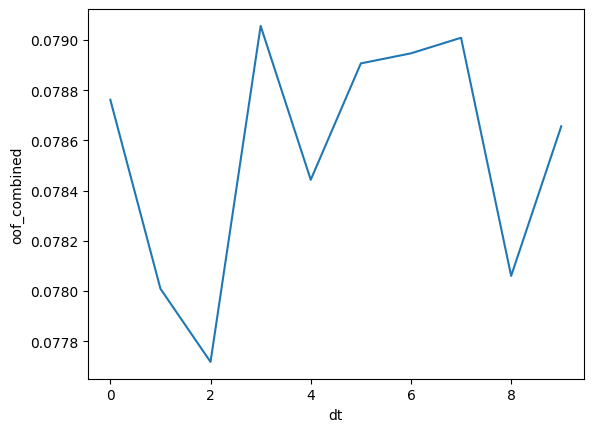

In [53]:
sns.lineplot(df_train.group_by("dt").agg(pl.mean("oof_combined")).sort("dt"), x="dt", y="oof_combined")




/home/peter/venvs/base_venv/lib/python3.10/site-packages/seaborn/_core/data.py:275: UserWarning: DataFrame interchange with pandas<2.0.2 has some known issues. You are using pandas 1.5.3. Continuing, but it is recommended to carefully inspect the results and to consider upgrading.
  data = convert_dataframe_to_pandas(data)


<Axes: xlabel='dt', ylabel='target'>

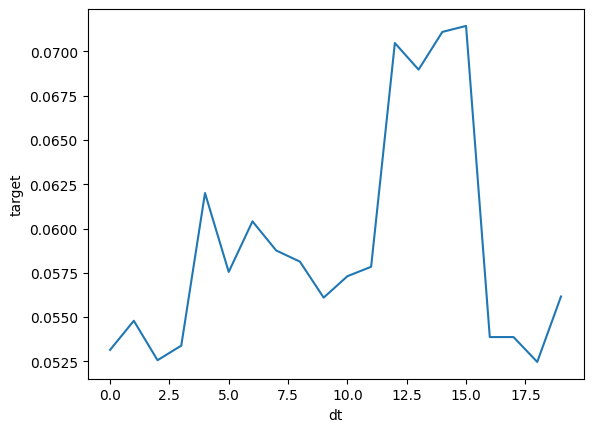

In [18]:
sns.lineplot(df_train.group_by("dt").agg(pl.mean("target")).sort("dt"), x="dt", y="target")
